In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Futura')
import pandas as pd
from IPython.display import display

df = pd.read_csv('TTS_LBNL_public_file_07-Sep-2022_all.csv')

/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_43806/3898072435.py:7: DtypeWarning: Columns (1,2,3,14,15,17,19,27,28,30,31,33,34,37,38,39,52,53,55,56,58,59,73,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TTS_LBNL_public_file_07-Sep-2022_all.csv')


In [3]:
sp = df[['installation_date', 'system_size_DC', 'total_installed_price','module_manufacturer_1', 'BIPV_module_1', 'nameplate_capacity_module_1', 'efficiency_module_1']]
sp2 = sp[sp['module_manufacturer_1']=='SunPower']
sp2['installation_date'] = pd.to_datetime(sp2['installation_date'], dayfirst = True)
sp2['$/W'] = sp2['total_installed_price']/(1000*sp2['system_size_DC'])
sp2.drop(sp2[sp2['installation_date']< '2010-01-01'].index, inplace = True)
sp2.head()

/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_43806/312596839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp2['installation_date'] = pd.to_datetime(sp2['installation_date'], dayfirst = True)
/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_43806/312596839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp2['$/W'] = sp2['total_installed_price']/(1000*sp2['system_size_DC'])
/var/folders/r7/6ccvvfw169jbjdxzjkkphblx0wsjlg/T/ipykernel_43806/312596839.py:5: SettingWithCopyWarnin

,installation_date,system_size_DC,total_installed_price,module_manufacturer_1,BIPV_module_1,nameplate_capacity_module_1,efficiency_module_1,$/W
1400,2010-01-18,9.87,76000.0,SunPower,0,210.0,0.169355,7.700101
1723,2010-01-05,5.04,42000.0,SunPower,0,210.0,0.169355,8.333333
1788,2010-02-12,20.13,170000.0,SunPower,0,305.0,0.187035,8.445107
1824,2010-01-04,4.05,33323.0,SunPower,0,225.0,0.181452,8.227901
1945,2010-01-11,25.76,212622.0,SunPower,0,230.0,0.184875,8.253960


In [4]:
avg = sp2.groupby(sp2.installation_date.dt.year)['$/W'].mean()
print(avg)

installation_date
2010.0    6.741563
2011.0    6.355631
2012.0    5.063114
2013.0    4.305164
2014.0    2.868220
2015.0    3.354618
2016.0    4.057690
2017.0    3.784433
2018.0    3.719422
2019.0    4.036625
2020.0    4.226307
2021.0    4.439111
2022.0    4.489399
Name: $/W, dtype: float64


(0.0, 8.0)

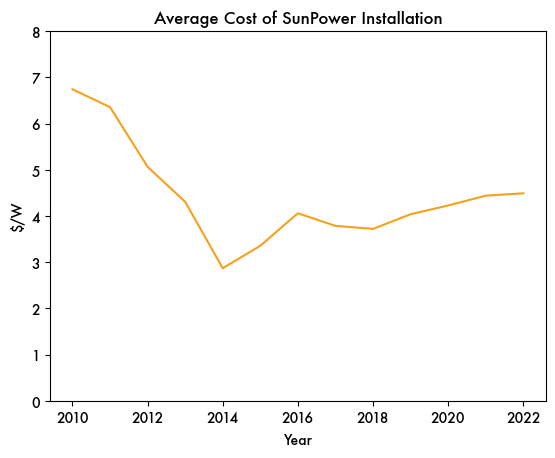

In [5]:
year = list(range(2010,2023,1))
plt.plot(year, avg, color = '#F7A11A')
plt.title('Average Cost of SunPower Installation')
plt.xlabel('Year')
plt.ylabel('$/W')
plt.ylim([0, 8])

installation_date
2010.0    0.181573
2011.0    0.184507
2012.0    0.191311
2013.0    0.197499
2014.0    0.199797
2015.0    0.200965
2016.0    0.202915
2017.0    0.207578
2018.0    0.211300
2019.0    0.212068
2020.0    0.211113
2021.0    0.214455
2022.0    0.212674
Name: efficiency_module_1, dtype: float64


Text(0, 0.5, '% Efficiency')

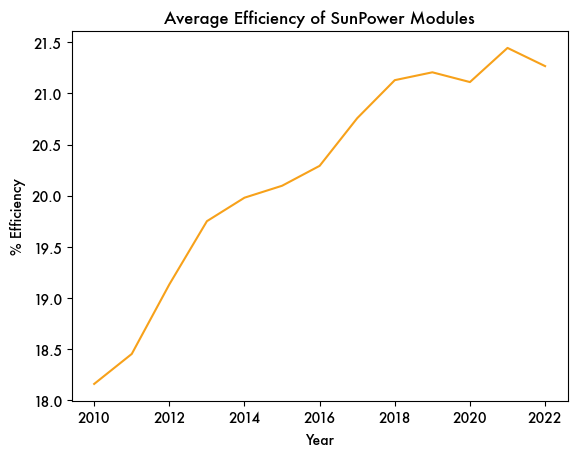

In [6]:
efficiency = sp2.groupby(sp2.installation_date.dt.year)['efficiency_module_1'].mean()
print(efficiency)
percent = efficiency*100
plt.plot(year, percent, color = '#F7A11A')
plt.title('Average Efficiency of SunPower Modules')
plt.xlabel('Year')
plt.ylabel("% Efficiency")

installation_date
2010.0    233.528412
2011.0    245.299054
2012.0    275.225647
2013.0    300.575430
2014.0    310.691097
2015.0    316.519063
2016.0    322.678018
2017.0    336.744609
2018.0    345.434322
2019.0    350.221963
2020.0    355.820670
2021.0    364.952726
2022.0    356.183908
Name: nameplate_capacity_module_1, dtype: float64


Text(0, 0.5, 'Capacity (W)')

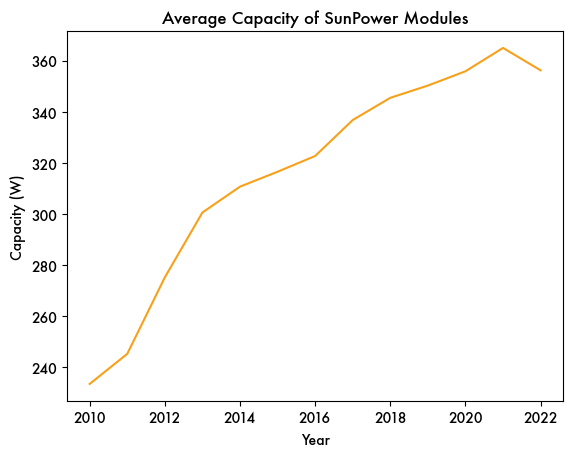

In [7]:
capacity = sp2.groupby(sp2.installation_date.dt.year)['nameplate_capacity_module_1'].mean()
print(capacity)
plt.plot(year, capacity, color = '#F7A11A')
plt.title('Average Capacity of SunPower Modules')
plt.xlabel('Year')
plt.ylabel("Capacity (W)")

I think it could be better to create a chart that lists the effiencies per module and capacities!